# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import pandas as pd 

In [3]:
import requests

In [4]:
#Exercise 2 Download HTML ✓
url = "https://books.toscrape.com/"
response = requests.get(url)
if response.status_code == 200:
    print("Todo ok")
else: 
    print("Todo mal")

Todo ok


In [5]:
#Exercise 3 Transform the HTML and cleaning the values✓
Books_table = []
 #Content parsing
soup = BeautifulSoup(response.content)
 
 #Tags filtering for title, price, if it is in stock and the start rating:

 #Filter: 
books_items = soup.find_all('li', class_="col-xs-6 col-sm-4 col-md-3 col-lg-3" ) # Finds all the lists with class="the values that I'm looking for"


#To get the books information like Title, Price, Availability and the Stars rating(in str):
for books in books_items:
    raw_title = books.find('h3').find('a') #Finds the book title 
    title_tag = raw_title.text.strip()

    raw_price = books.find('p', class_='price_color') #Finds the book price and returns the price in clean format
    total_price = raw_price.text.strip().replace('£','')

    availability = books.find('p', class_="instock availability") #Finds the book availability and returns the stock in clean format
    avail_confir = availability.text.strip()
    
    starts_tag = books.find('p', class_='star-rating')  
    if starts_tag: #finds a <p> tag with class=star-rating, get all its class names and the the second part is the rating(stars) like 'Three'
        classes = starts_tag.get('class')
        rating = classes[1]
    
    Books_table.append({
    'Title': title_tag,
    'Price': total_price,
    'Availability': avail_confir,
    'Rating': rating 
})

    #print(f"Title: {title_tag}")
    #print(f"Price: {total_price}")
    #print(f"Availability: {avail_confir}")
    #print(f"Rating: {rating} stars\n")

In [6]:
#Exercise 4: Process the DataFrame (Creation of df)
df = pd.DataFrame(Books_table)
df.head()
#df.tail()

,Title,Price,Availability,Rating
0,A Light in the ...,51.77,In stock,Three
1,Tipping the Velvet,53.74,In stock,One
2,Soumission,50.10,In stock,One
3,Sharp Objects,47.82,In stock,Four
4,Sapiens: A Brief History ...,54.23,In stock,Five


In [7]:
#Exercise 5: Storing data in SQL 

#Connections
conn = sqlite3.connect('books.db') #Creates the conecction and the file 
cursor = conn.cursor() #To be able to run commands 

#Table Creation 
cursor.execute('''
CREATE TABLE IF NOT EXISTS Books(Title TEXT,
                Price REAL,
                Availability TEXT,
                Rating TEXT)
''')

df.to_sql('Books', conn, if_exists='append', index=False)

20

In [8]:
#Commiting changes and closing the connection
conn.commit()
conn.close()

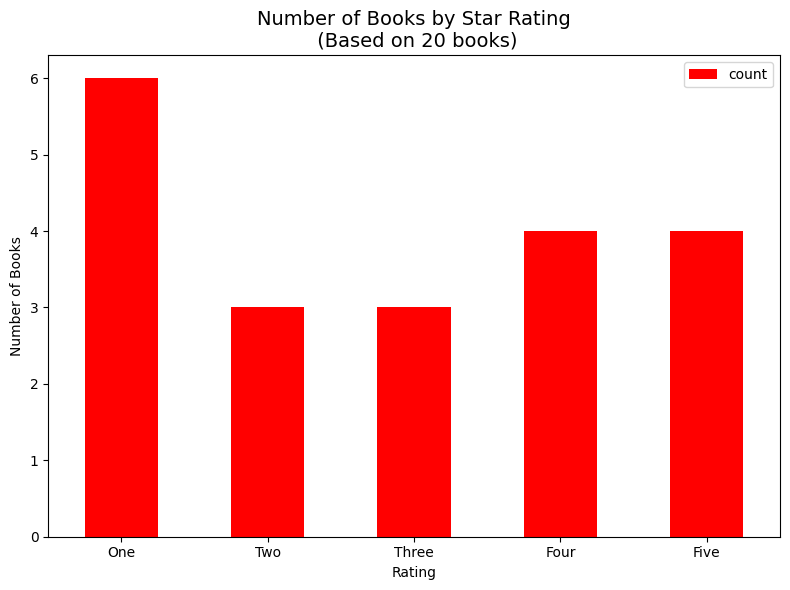

In [9]:
#Exercise 6: Visualization
star_order = ['One', 'Two', 'Three', 'Four', 'Five'] #To indicate the index order 
rating_counts = df['Rating'].value_counts().reindex(star_order) #Selects the "ratings" to plot them, counts the values in the rating and then sorts the index by the pre-defined order

plt.figure(figsize=(8,6))
rating_counts.plot(kind='bar', color='red') #Plots a Bar chart 
plt.title('Number of Books by Star Rating\n (Based on 20 books)', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend()
plt.show()